In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


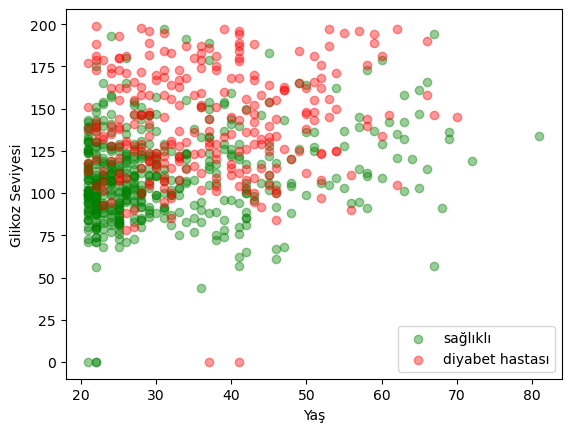

In [18]:
seker_hastalari = data[data.Outcome == 1]
saglikli_insanlar = data[data.Outcome == 0]

plt.scatter(saglikli_insanlar.Age,saglikli_insanlar.Glucose,color="green",label="sağlıklı", alpha = 0.4)
plt.scatter(seker_hastalari.Age,seker_hastalari.Glucose,color="red",label="diyabet hastası", alpha = 0.4)
plt.xlabel("Yaş")
plt.ylabel("Glikoz Seviyesi")
plt.legend()
plt.show()

In [30]:
# x ve y eksenleri belirleyelim
y = data.Outcome.values
x_ham_veri = data.drop(["Outcome"],axis=1)

x = (x_ham_veri - np.min(x_ham_veri)/(np.max(x_ham_veri)-np.min(x_ham_veri)))

# önce 
print("Normalizasyon öncesi ham verileri \n")
print(x_ham_veri.head())

# sonra 
print("\nNormalizasyon sonrası yapay zekaya eğitim için vereceğimiz veriler:\n")
print(x.head())

Normalizasyon öncesi ham verileri 

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

Normalizasyon sonrası yapay zekaya eğitim için vereceğimiz veriler:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           6

In [64]:
# train datamız ile test datamızı ayırıyoruz
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# knn modeli oluşturuyoruz.
knn = KNeighborsClassifier(n_neighbors = 8) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("K=8 için test verilerimizin doğrulama testi sonucu : ",knn.score(x_test,y_test))

K=8 için test verilerimizin doğrulama testi sonucu :  0.7662337662337663


In [52]:

# k kaç olmalı?
# en iyi k değerini bulalım.
sayac= 1
for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train,y_train)
    print(sayac," " , "Doğruluk oranı: %" , knn_yeni.score(x_test,y_test)*100)
    sayac += 1


1   Doğruluk oranı: % 72.07792207792207
2   Doğruluk oranı: % 72.72727272727273
3   Doğruluk oranı: % 74.02597402597402
4   Doğruluk oranı: % 72.07792207792207
5   Doğruluk oranı: % 73.37662337662337
6   Doğruluk oranı: % 77.27272727272727
7   Doğruluk oranı: % 75.97402597402598
8   Doğruluk oranı: % 76.62337662337663
9   Doğruluk oranı: % 76.62337662337663
10   Doğruluk oranı: % 75.97402597402598


In [74]:
# Yeni bir hasta tahmini için:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# normalization yapıyoruz - daha hızlı normalization yapabilmek için MinMax  scaler kullandık...
sc = MinMaxScaler()
sc.fit(x_ham_veri)  # fit işlemi ayrı yapılır
 
new_prediction = knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]

C:\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0